# Linear Regression on Boston Housing Dataset

## Predicting the price of house in boston using various features

*Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Creating a dataframe
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# We see that 'MEDV' i.e the target variable is missing
df['MEDV']=boston.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#Check for missing data

print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


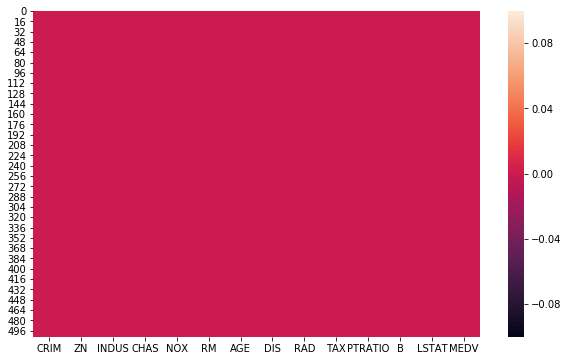

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

* Hence no missing value

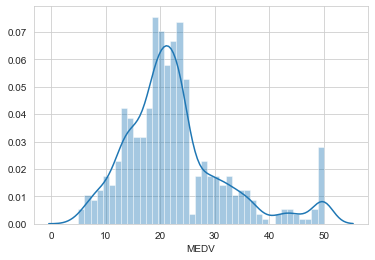

In [12]:
sns.set_style('whitegrid')
sns.distplot(df['MEDV'],bins=40)

We see that the values of MEDV are distributed normally with few outliers

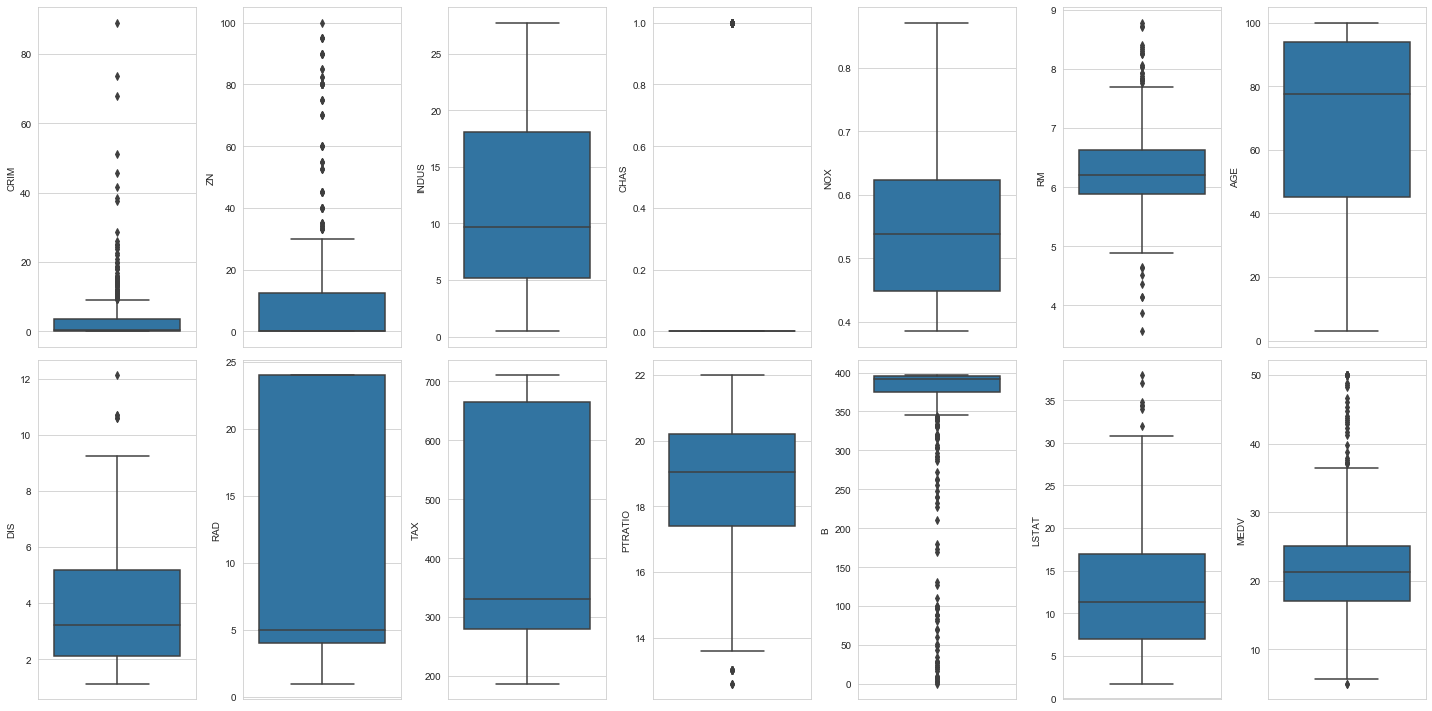

In [13]:
fig,axes = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
k=0
axes=axes.flatten()
for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=axes[k])
    k=k+1
plt.tight_layout()

* We have visualized all the outliers in the respective columns
* Now we will remove the columns with maximun outliers

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
q3=df['MEDV'].quantile(0.75)
q1=df['MEDV'].quantile(0.25)
iqr=q3-q1

l1=1.5*iqr+q3
u1=1.5*iqr-q1

df=df[(df['MEDV']>=u1) & (df['MEDV']<=l1)]

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,3.802014,10.535256,11.411154,0.059829,0.557407,6.177019,68.800427,3.823432,9.730769,414.185897,18.624145,354.354786,13.333419,20.651923
std,8.893448,22.140280,6.793515,0.237424,0.117485,0.576524,28.061105,2.126017,8.823280,168.992143,2.061442,94.507909,6.979687,6.518911
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.082973,0.000000,5.640000,0.000000,0.453000,5.874750,45.325000,2.100525,4.000000,284.000000,17.400000,374.650000,7.790000,16.375000
50%,0.250895,0.000000,9.900000,0.000000,0.538000,6.162500,77.700000,3.267450,5.000000,336.000000,19.100000,391.955000,12.135000,20.600000
75%,3.840055,12.500000,18.100000,0.000000,0.624000,6.498750,94.150000,5.234500,24.000000,666.000000,20.200000,396.540000,17.270000,24.025000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,36.500000


In [58]:
for i,j in df.items():
    q3=j.quantile(0.75)
    q1=j.quantile(0.25)
    iqr=q3-q1

    l1=1.5*iqr+q3
    u1=1.5*iqr-q1

    df=j[(j>=u1)|(j<=l1)]

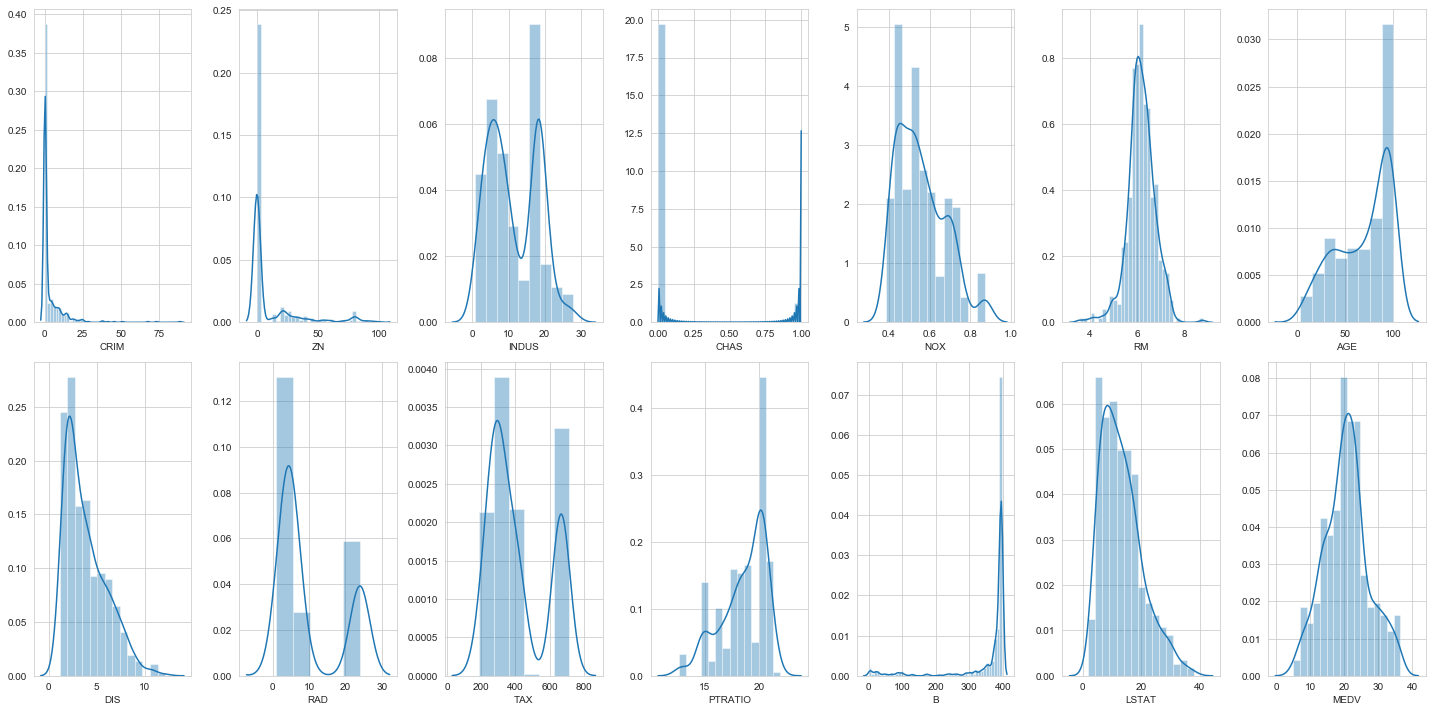

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout()


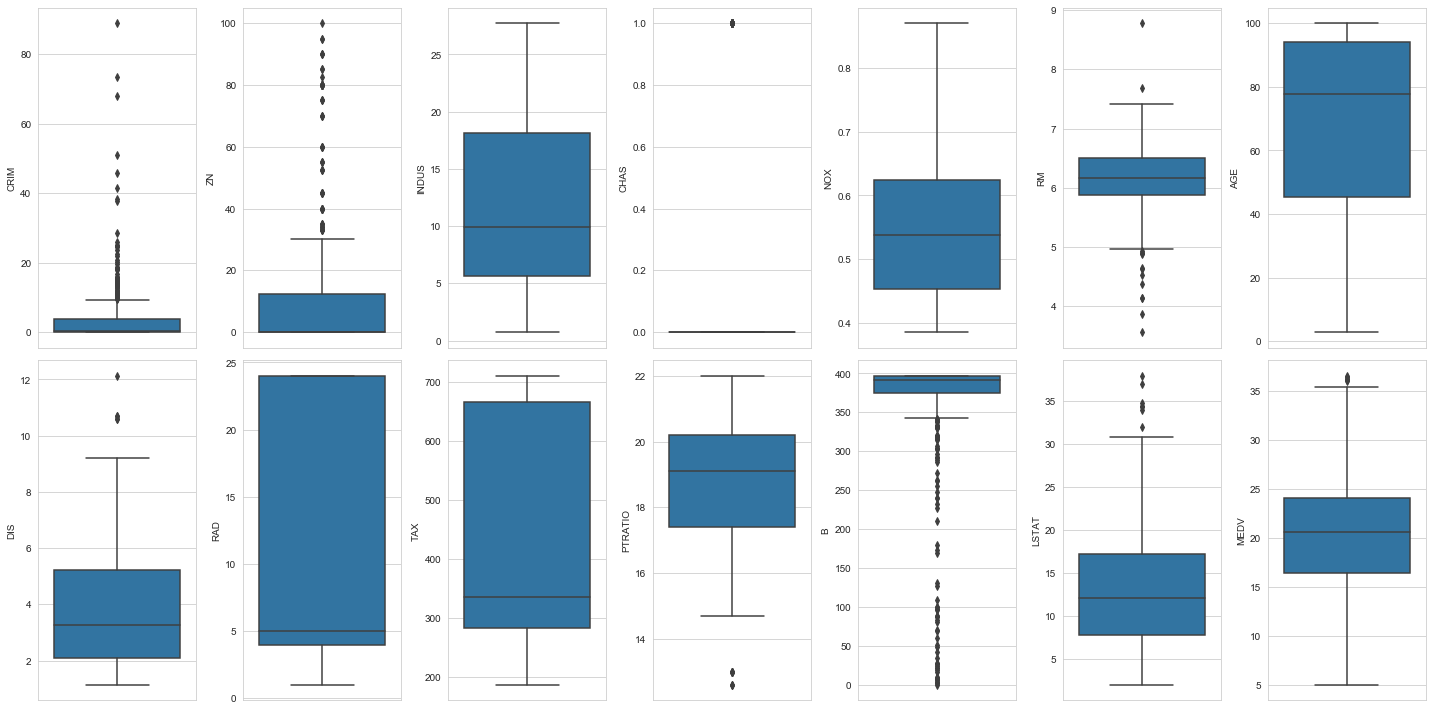

In [20]:
fig,axes = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
k=0
axes=axes.flatten()
for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=axes[k])
    k=k+1
plt.tight_layout()

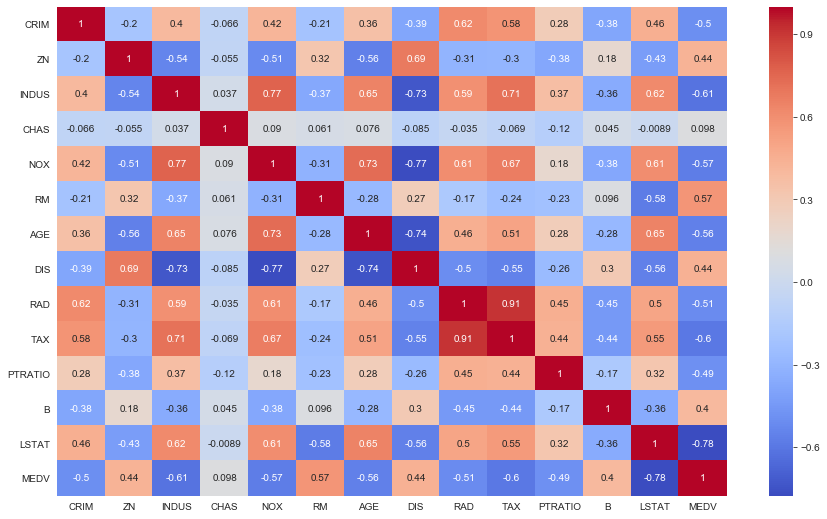

In [21]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

 We created a correlation matrix that measures the linear relationships between the variables.                                  
* The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables.                                                                                          
* When it is close to -1, the variables have a strong negative correlation.

* The above heatmap implies that 'RAD' i.e. accessibility to radial highways and 'TAX' full-value property-tax rate per $10,000 are highly correlated 

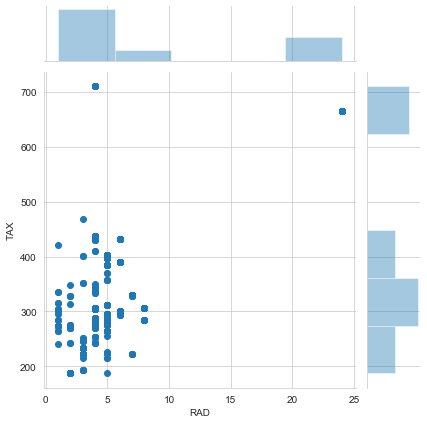

In [22]:
sns.jointplot(x='RAD',y='TAX',data=df,kind='scatter')

### Training a Linear Regression Model

In [23]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

### Train Test Split
 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# print the intercept
print(lm.intercept_)

35.935995124880776


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.099434
ZN,0.032290
INDUS,-0.014451
CHAS,1.870720
NOX,-9.647347
RM,1.937354
AGE,-0.032577
DIS,-0.914923
RAD,0.247562
TAX,-0.012756


In [28]:
#making predictions
predictions = lm.predict(X_test)

In [29]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.457590970429834
Mean Square Error: 11.20184043669801
Root Mean Square Error: 3.34691506266562


In [43]:
import statsmodels.api as sm

In [44]:
X1=np.append(arr=np.ones((468,1)).astype(int),values=X,axis=1)

In [45]:
X_opt=X1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [46]:
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()

In [47]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     93.81
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          9.17e-115
Time:                        20:16:39   Log-Likelihood:                -1249.5
No. Observations:                 468   AIC:                             2525.
Df Residuals:                     455   BIC:                             2579.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0552      3.773      7.171      0.000      19.640      34.470
x1            -0.1461      0.024     -5.987      0.000      -0.194      -0.098
x2             0.0332      0.011      2.925      0.004       0.011       0.056
x3            -0.0815      0.048     -1.715      0.087      -0.175       0.012
x4             1.0440      0.715      1.461      0.145      -0.361       2.449
x5           -12.4907      2.913     -4.288      0.000     -18.215      -6.766
x6             3.6750      0.320     11.484      0.000       3.046       4.304
x7            -0.0565      0.010     -5.912      0.000      -0.075      -0.038
x8            -1.0633      0.157     -6.774      0.000      -1.372      -0.755
x9             0.2076      0.051      4.102      0.000       0.108       0.307
x10           -0.0121      0.003     -4.209      0.000      -0.018      -0.006
x11           -0.7262      0.102     -7.122      0.000      -0.927      -0.526
x12            0.0096      0.002      4.834      0.000       0.006       0.014
==============================================================================
Omnibus:                       94.542   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.656
Skew:                           0.934   Prob(JB):                     1.27e-63
Kurtosis:                       6.371   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Since, x3 and x4 has a P value which is greater than 0.05, it shows that the variable x3 and x4 has no significant effect on the output. Hence, we ignore it

In [48]:
X_opt=X1[:,[0,1,2,5,6,7,8,9,10,11,12]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          8.69e-116
Time:                        20:16:53   Log-Likelihood:                -1252.0
No. Observations:                 468   AIC:                             2526.
Df Residuals:                     457   BIC:                             2572.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2360      3.783      7.199      0.000      19.801      34.671
x1            -0.1466      0.024     -6.001      0.000      -0.195      -0.099
x2             0.0351      0.011      3.098      0.002       0.013       0.057
x3           -13.5691      2.794     -4.857      0.000     -19.059      -8.079
x4             3.7826      0.317     11.939      0.000       3.160       4.405
x5            -0.0564      0.010     -5.888      0.000      -0.075      -0.038
x6            -1.0131      0.154     -6.592      0.000      -1.315      -0.711
x7             0.2354      0.049      4.808      0.000       0.139       0.332
x8            -0.0146      0.003     -5.576      0.000      -0.020      -0.009
x9            -0.7626      0.101     -7.559      0.000      -0.961      -0.564
x10            0.0099      0.002      4.970      0.000       0.006       0.014
==============================================================================
Omnibus:                       96.278   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.712
Skew:                           0.944   Prob(JB):                     3.05e-66
Kurtosis:                       6.451   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X_opt=X1[:,[0,1,2,5,6,7,8,9,10,11,12]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          8.69e-116
Time:                        20:15:37   Log-Likelihood:                -1252.0
No. Observations:                 468   AIC:                             2526.
Df Residuals:                     457   BIC:                             2572.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2360      3.783      7.199      0.000      19.801      34.671
x1            -0.1466      0.024     -6.001      0.000      -0.195      -0.099
x2             0.0351      0.011      3.098      0.002       0.013       0.057
x3           -13.5691      2.794     -4.857      0.000     -19.059      -8.079
x4             3.7826      0.317     11.939      0.000       3.160       4.405
x5            -0.0564      0.010     -5.888      0.000      -0.075      -0.038
x6            -1.0131      0.154     -6.592      0.000      -1.315      -0.711
x7             0.2354      0.049      4.808      0.000       0.139       0.332
x8            -0.0146      0.003     -5.576      0.000      -0.020      -0.009
x9            -0.7626      0.101     -7.559      0.000      -0.961      -0.564
x10            0.0099      0.002      4.970      0.000       0.006       0.014
==============================================================================
Omnibus:                       96.278   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.712
Skew:                           0.944   Prob(JB):                     3.05e-66
Kurtosis:                       6.451   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""